#  Unsupervised Machine Learning 

**Author:**
[Anthony Strittmatter](http://www.anthonystrittmatter.com)

The task of this exercise is to analyze voting data from the 111th US House of Representatives in 2009-2011. Votes in which names and positions are recorded are called "roll calls". The ﬁle *rollcall-votes.Rdata* contains whether the 445 members of the House voted "yea" = 1 or "nea" = -1 in 1647 diﬀerent voting decisions. If the vote = 0, the politician missed the voting. The ﬁle *rollcall-members.Rdata* contains further information about the members of the House such as party aﬃliation (Republican or Democrat) and which US state the politician represents. The data set comes from the website [voteview.com](http://www.voteview.com).

## Load Data 

In [1]:
########################  Load Data  ########################

### Load data
load("rollcall-votes.Rdata")
load("rollcall-members.Rdata")

print('Data loaded.')

##############################################################

[1] "Data loaded."


## Exercise 1: Data Description

**a) How many Democrats and Republicans are in the House? Who has the majority? Report the special case Democrat-Republican separately.**

In [21]:
print('# Counts of Democrats, Republicans and one special politician')
table(members$party)

print('# Shares of Democrats, Republicans and one special politician')
round(table(members$party)/nrow(members),3)

[1] "# Counts of Democrats, Republicans and one special politician"



  D  DR   R 
262   1 182 

[1] "# Shares of Democrats, Republicans and one special politician"



    D    DR     R 
0.589 0.002 0.409 

**b) Generate a variable for the number of votes each politician missed. How many politicians voted in all votings? Plot a histogram of the shares of missed votings with 100 bins.**

In [3]:
# Count missing votings for each politician and plot the counts
missings <- rowSums(votes==0)

# No. politicians who always voted
sum(missings == 0)

[1] 3

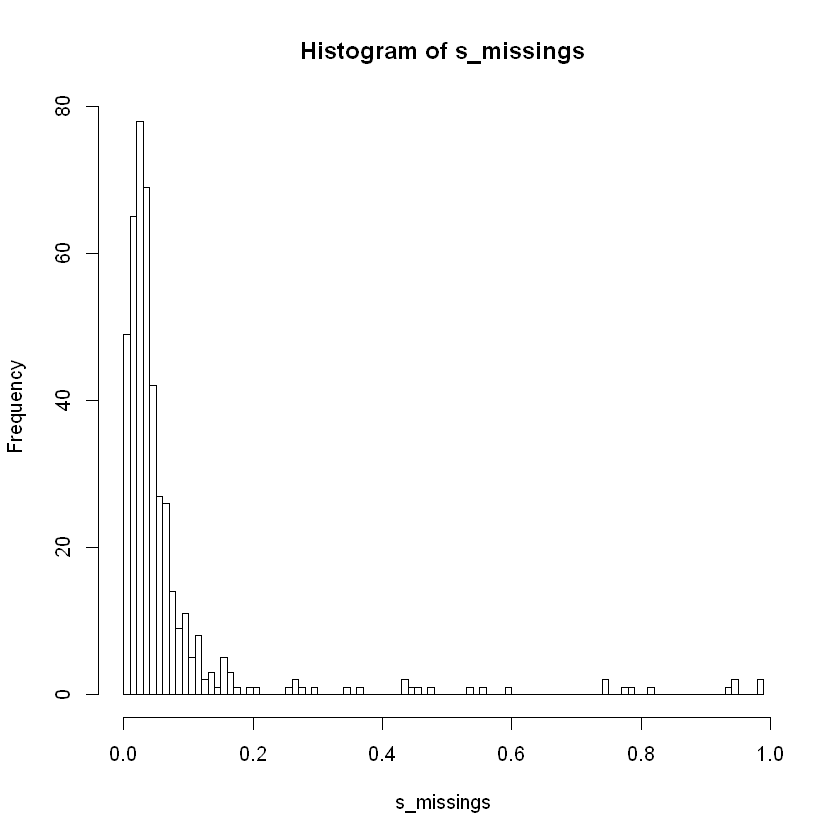

In [4]:
# Shares of missing votings
s_missings <- missings/(ncol(votes))

# Histogram with 100 bins
hist(s_missings, breaks = 100)

**c) Generate variables for the number of times each politician voted “yea” and “nea”. Make a scatter plot of the number of “nea” and “yea”. Use diﬀerent colors to diﬀerentiate the points in the scatter plot by the party aﬃliation. Can we claim based on these results that the party could be a good predictor for the voting behavior? What information do we lose by aggregation of the votes?**

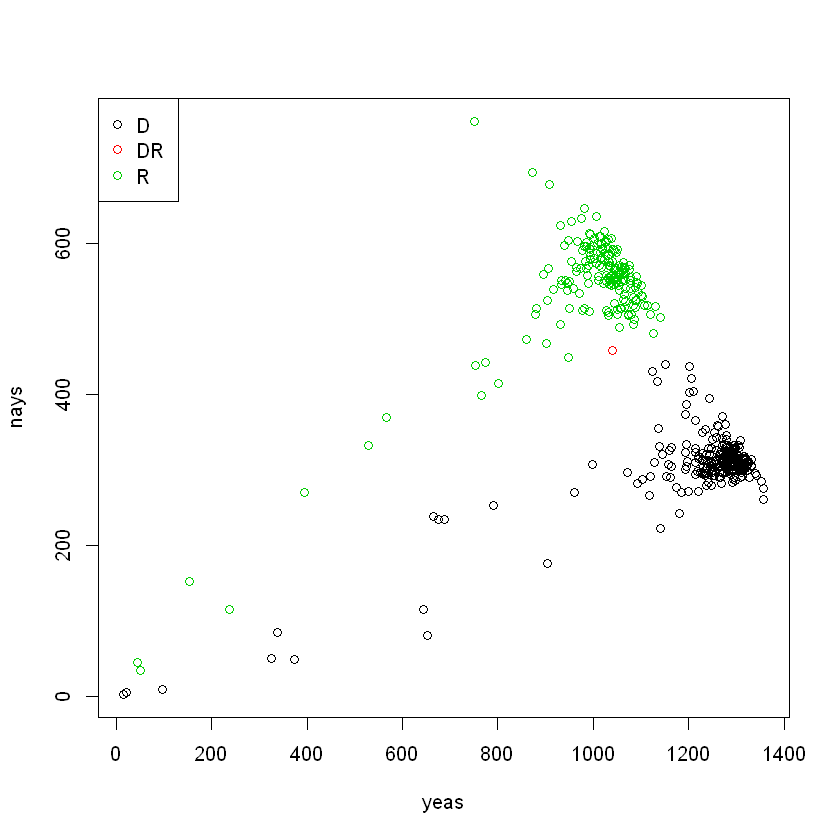

In [5]:
# Counts - yes and nos
yeas <- rowSums(votes[,(1:ncol(votes))]== 1)
nays <- rowSums(votes[,(1:ncol(votes))]== -1)

# Plots - Party
plot(yeas, nays, col = members$party)
legend('topleft', legend = levels(members$party), col = 1:3,  pch = 1)

## Exercise 2: Principal Component Analysis (PCA)

**a) Run a principal component analysis on the votes data set. How many principal components are there?**

In [22]:
# PCA
pr.out = prcomp(votes , center = TRUE, scale = TRUE)

# No of principal components
dim(pr.out$rotation)[2]

[1] 445

**b) Calculate the proportion of variance explained by each principal component and plot the proportions for the ﬁrst 10 principal components.**

In [7]:
# variance explained by each component
pr.var = pr.out$sdev^2

# Proportion of variance explained
pve=pr.var/sum(pr.var)

# Print first 10 PC
pve[1:10]

[1] 0.363766111 0.129597633 0.033564738 0.025048759 0.011626388 0.011107666
 [7] 0.008850297 0.008244772 0.006765325 0.006487050

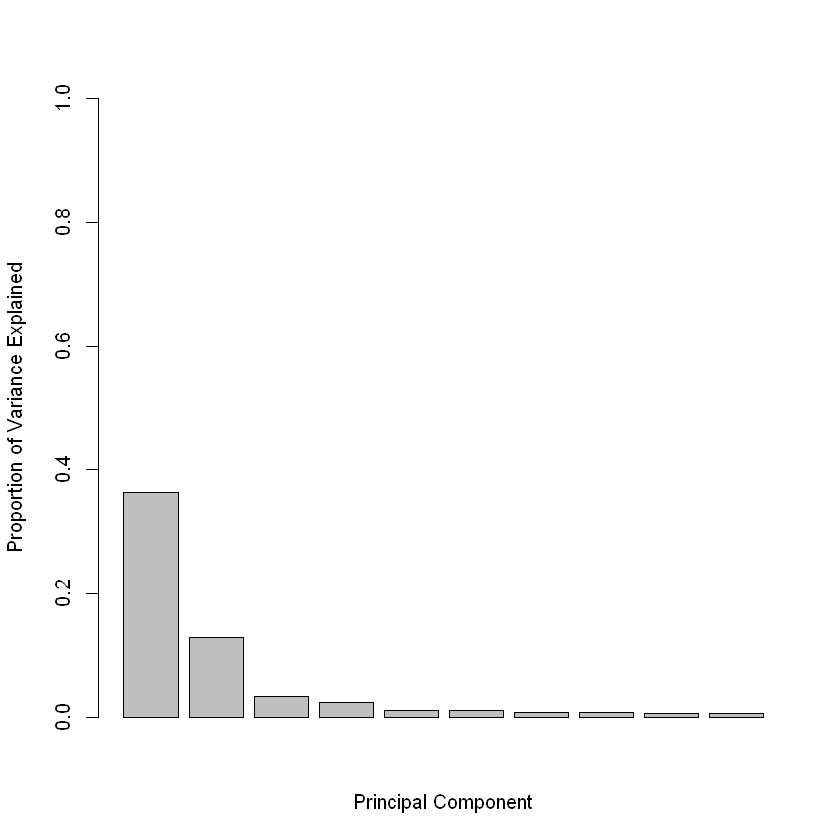

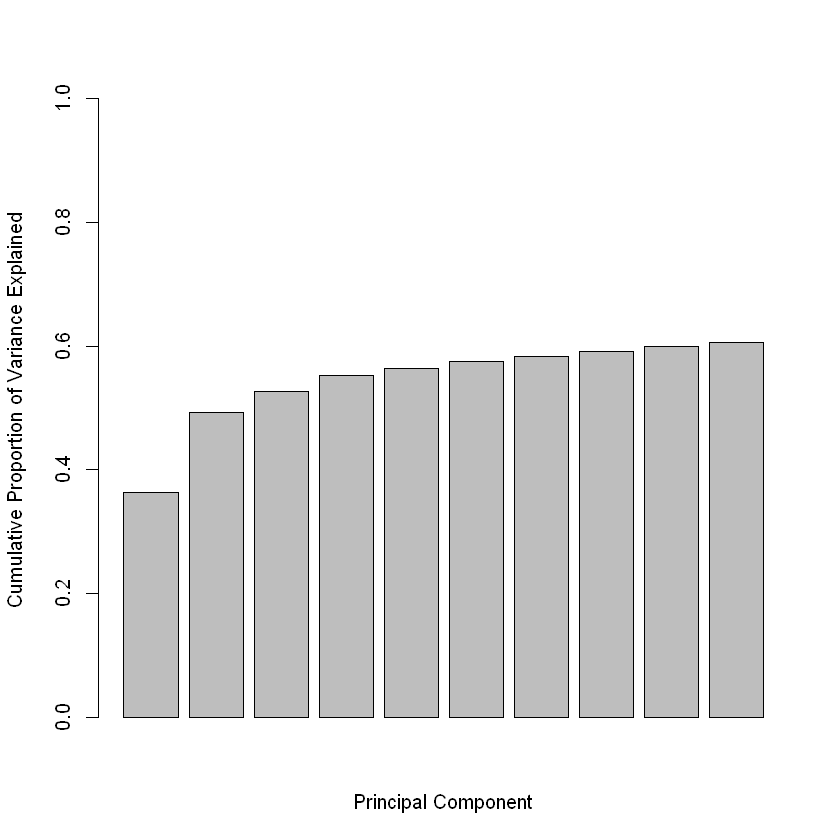

In [8]:
# Plot the first 10 PC
barplot(pve[1:10], xlab=" Principal Component ", ylab=" Proportion of Variance Explained ", ylim=c(0,1))
barplot(cumsum(pve[1:10]), xlab=" Principal Component ", ylab ="Cumulative Proportion of Variance Explained ", ylim=c(0,1))

**c) Plot the ﬁrst two principal components and use color to diﬀerentiate the observations by the party aﬃliation.**

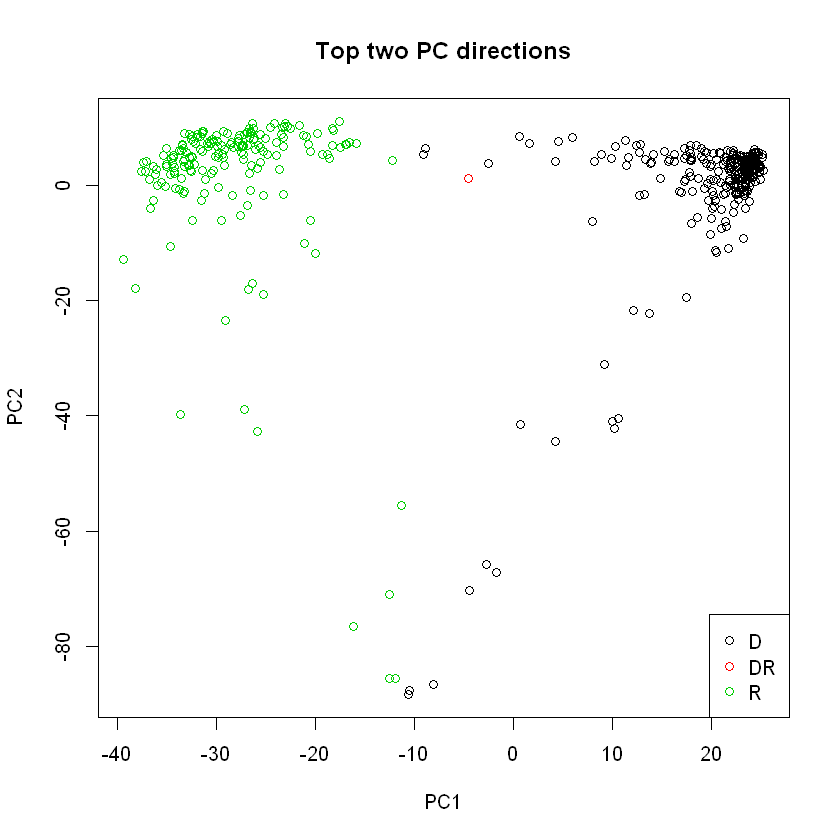

In [9]:
# Plot the first two principal components, color the party membership
plot(pr.out$x[,1], pr.out$x[,2], xlab = "PC1", ylab = "PC2", col = members$party, main = "Top two PC directions")
legend('bottomright', legend = levels(members$party), col = 1:3,  pch = 1)

**d) With the help of the ﬁrst principal component ﬁnd politicians on the far right (very conservative) and far left (very liberal).**

In [10]:
## Far right (very conservative)
head(sort(pr.out$x[,1]))

BROUN (R GA-10)     FLAKE (R AZ-6) HENSARLIN (R TX-5)   LAMBORN (R CO-5) 
         -39.37394          -38.25067          -37.58706          -37.37032 
   FRANKS (R AZ-2)      FOXX (R NC-5) 
         -37.22842          -37.11701

In [11]:
## Far left (very liberal)
head(sort(pr.out$x[,1], decreasing=TRUE))

EDWARDS (D MD-4)    PRICE (D NC-4)   MATSUI (D CA-5) SCHAKOWS (D IL-9) 
         25.29151          25.15912          25.12481          24.98754 
  HIRONO (D HI-2) SERRANO (D NY-16) 
         24.98547          24.97287

**e) Find the votings which have the most extreme loadings for the second principal component. Analyze the voting behavior in these votings and come up with the interpretation of the second component.**

In [12]:
# PC 2
head(sort(pr.out$x[,2]))
# No clear pattern based on party and state information

SOLIS (D CA-32) GILLIBRAND (D NY-20)      PELOSI (D CA-8) 
           -88.31351            -87.58872            -86.53586 
   STUTZMAN (R IN-3)       REED (R NY-29)      GRAVES (R GA-9) 
           -85.59217            -85.53636            -76.49658

In [13]:
# Look at the largest loadings in PC2 to discern an interpretation.
loadings <- pr.out$rotation
loadings[order(abs(loadings[,2]), decreasing=TRUE)[1:5],2]

Vote.1146   Vote.658  Vote.1090  Vote.1104  Vote.1149 
0.05605862 0.05461947 0.05300806 0.05168382 0.05155729

In [14]:
# Analyze voting behavior
table(votes[,1146])
table(votes[,658])
table(votes[,1090])


  0   1 
 16 429 


  0   1 
 13 432 


  0   1 
 22 423 

In [15]:
# Either everyone voted "yea" or missed the voting.
# These votes all correspond to near-unanimous symbolic action.

# Mystery Solved: the second PC is just attendance!
head(sort(rowSums(votes==0), decreasing=TRUE))

SOLIS (D CA-32) GILLIBRAND (D NY-20)       REED (R NY-29) 
                1628                 1619                 1562 
   STUTZMAN (R IN-3)      PELOSI (D CA-8)      GRAVES (R GA-9) 
                1557                 1541                 1340

## Exercise 3: k-means Clustering

**a) Run a k-means clustering procedure to detect 2 clusters in the data. How many Democrats and Republicans are in each cluster?**

In [16]:
set.seed(11122019)

# K-means clustering with 2 clusters
km.out = kmeans(votes, 2, nstart = 20)
km.out$cluster

BONNER (R AL-1)      BRIGHT (D AL-2)      ROGERS (R AL-3) 
                   2                    2                    2 
   ADERHOLT (R AL-4)  GRIFFITH (D/R AL-5)      BACHUS (R AL-6) 
                   2                    2                    2 
      DAVIS (D AL-7)       YOUNG (R AK-1) KIRKPATRICK (D AZ-1) 
                   1                    2                    1 
     FRANKS (R AZ-2)     SHADEGG (R AZ-3)      PASTOR (D AZ-4) 
                   2                    2                    1 
   MITCHELL (D AZ-5)       FLAKE (R AZ-6)    GRIJALVA (D AZ-7) 
                   1                    2                    1 
   GIFFORDS (D AZ-8)       BERRY (D AR-1)      SNYDER (D AR-2) 
                   1                    1                    1 
    BOOZMAN (R AR-3)        ROSS (D AR-4)    THOMPSON (D CA-1) 
                   2                    1                    1 
     HERGER (R CA-2)     LUNGREN (R CA-3)  MCCLINTOCK (R CA-4) 
                   2                    2                    2 
     MATSUI (D CA-5)     WOOLSEY (D CA-6)      MILLER (D CA-7) 
                   1                    1                    1 
     PELOSI (D CA-8)         LEE (D CA-9)   TAUSCHER (D CA-10) 
                   1                    1                    1 
 GARAMENDI (D CA-10)   MCNERNEY (D CA-11)     SPEIER (D CA-12) 
                   1                    1                    1 
     STARK (D CA-13)      ESHOO (D CA-14)      HONDA (D CA-15) 
                   1                    1                    1 
   LOFGREN (D CA-16)       FARR (D CA-17)    CARDOZA (D CA-18) 
                   1                    1                    1 
  RADANOVI (R CA-19)      COSTA (D CA-20)      NUNES (R CA-21) 
                   2                    1                    2 
  MCCARTHY (R CA-22)      CAPPS (D CA-23)   GALLEGLY (R CA-24) 
                   2                    1                    2 
    MCKEON (R CA-25)     DREIER (R CA-26)    SHERMAN (D CA-27) 
                   2                    2                    1 
    BERMAN (D CA-28)     SCHIFF (D CA-29)     WAXMAN (D CA-30) 
                   1                    1                    1 
   BECERRA (D CA-31)      SOLIS (D CA-32)        CHU (D CA-32) 
                   1                    2                    1 
    WATSON (D CA-33)   ROYBAL-A (D CA-34)     WATERS (D CA-35) 
                   1                    1                    1 
    HARMAN (D CA-36) RICHARDSON (D CA-37)   NAPOLITA (D CA-38) 
                   1                    1                    1 
   SANCHEZ (D CA-39)      ROYCE (R CA-40)      LEWIS (R CA-41) 
                   1                    2                    2 
    MILLER (R CA-42)       BACA (D CA-43)    CALVERT (R CA-44) 
                   2                    1                    2 
      BONO (R CA-45)   ROHRABAC (R CA-46)    SANCHEZ (D CA-47) 
                   2                    2                    1 
  CAMPBELL (R CA-48)       ISSA (R CA-49)    BILBRAY (R CA-50) 
                   2                    2                    2 
    FILNER (D CA-51)     HUNTER (R CA-52)      DAVIS (D CA-53) 
                   1                    2                    1 
    DEGETTE (D CO-1)       POLIS (D CO-2)     SALAZAR (D CO-3) 
                   1                    1                    1 
     MARKEY (D CO-4)     LAMBORN (R CO-5)     COFFMAN (R CO-6) 
                   1                    2                    2 
 PERLMUTTER (D CO-7)      LARSON (D CT-1)    COURTNEY (D CT-2) 
                   1                    1                    1 
    DELAURO (D CT-3)       HIMES (D CT-4)      MURPHY (D CT-5) 
                   1                    1                    1 
     CASTLE (R DE-1)      MILLER (R FL-1)        BOYD (D FL-2) 
                   2                    2                    1 
      BROWN (D FL-3)    CRENSHAW (R FL-4)   BROWN-WAI (R FL-5) 
                   1                    2                    2 
    STEARNS (R FL-6)        MICA (R F

In [17]:
# Tabulate party vs cluster
table(members$party, km.out$cluster)

    
       1   2
  D  258   4
  DR   0   1
  R    0 182

**b) Run a k-means clustering procedure for k ∈{2,...,20} and plot the within cluster sum of squared errors. Decide based on the plot what the optimal number of clusters is.**

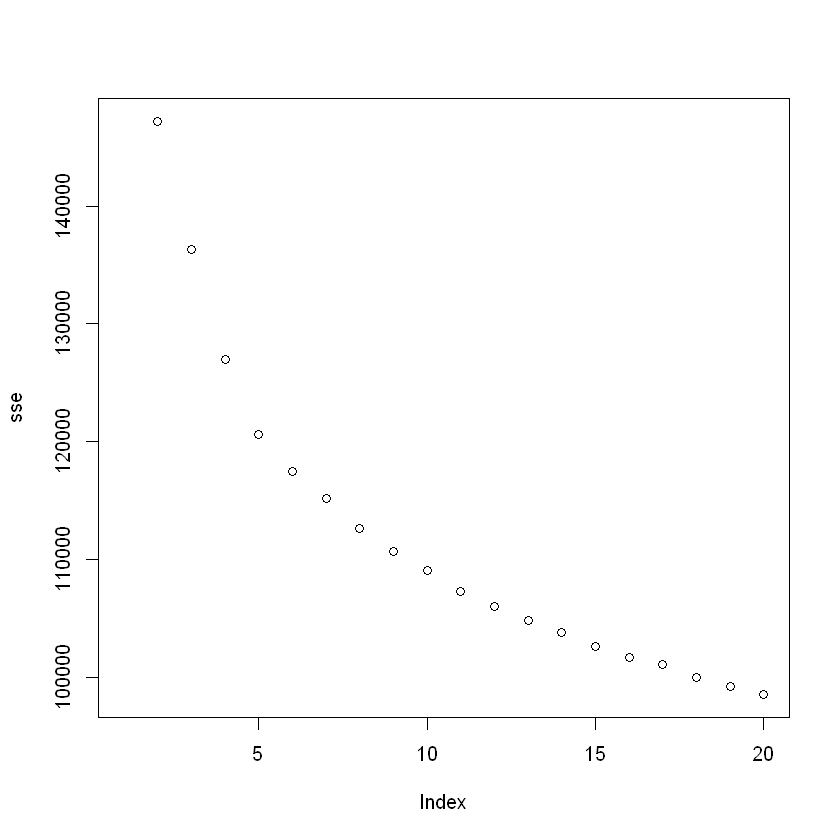

In [18]:
# How to analyze the optimal number of clusters

sse <- c()
sse[1] <- Inf

for (ind_cl in c(2:20)) {
  set.seed(3)
  km.out = kmeans (votes, ind_cl, nstart = 20)
  sse[ind_cl] = km.out$tot.withinss
}

plot(sse)
# Optimum 4-5 clusters

**c) Take the graph with two principal components and use color to visualize the clusters you found in the previous task.**

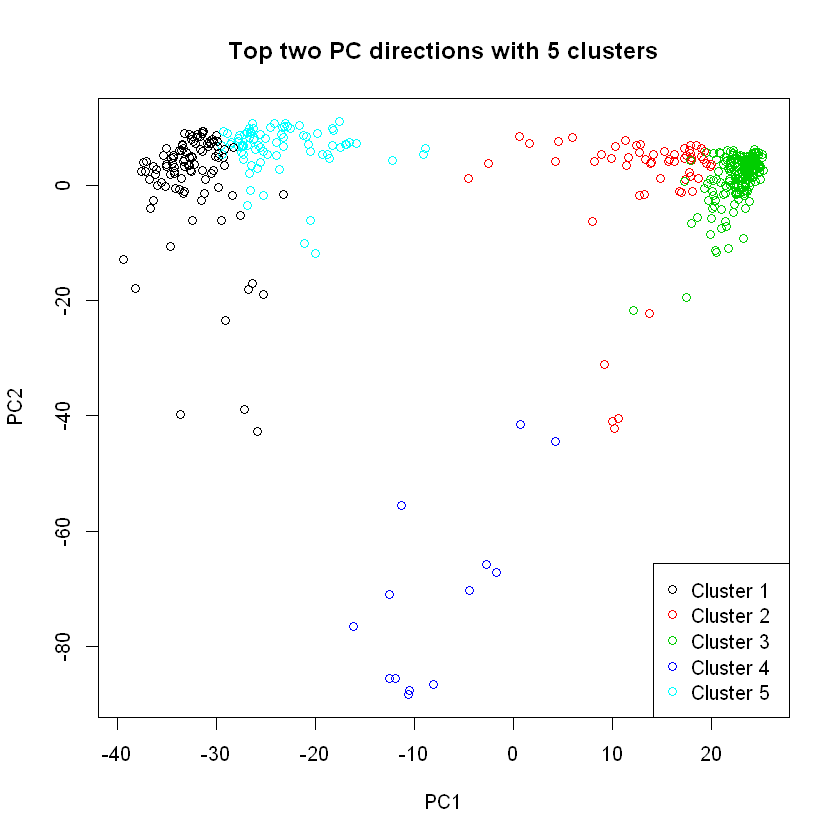

In [19]:
# Plot the 5 clusters on the PC components graph
set.seed(3)
km.out = kmeans (votes, 5, nstart = 20)

# Plot the first two principal components color the party membership
plot(pr.out$x[,1], pr.out$x[,2], xlab = "PC1", ylab = "PC2", col = km.out$cluster, main = "Top two PC directions with 5 clusters")
legend('bottomright', legend = c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5"), col = 1:5,  pch = 1)

**d) Run a k-means clustering procedure to detect 6 clusters with nstart = 1 and nstart = 20. Print out the within cluster sum of squared errors for both nstart values. What can you say about the importance of nstart on the convergence to the global optimum?**

In [20]:
# Analyzing how the number of starts work
set.seed (3)
print('With nstart = 1')
km.out = kmeans (votes,6, nstart = 1)
km.out$tot.withinss

print('With nstart = 20')
km.out =kmeans (votes,6, nstart = 20)
km.out$tot.withinss

[1] "With nstart = 1"


[1] 124967.3

[1] "With nstart = 20"


[1] 117465.4